<a href="https://colab.research.google.com/github/heinhtet14/Machine_Learning_Bootcamp/blob/main/Wk1-part-2-Intro_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Let's start with Pytorch:-**
PyTorch is a library for Python programs that facilitates building deep learning projects PyTorch supports dynamic computational graphs, which means the network behavior can be changed programmatically at runtime. This facilitates more efficient model optimization and gives PyTorch a major advantage over other machine learning frameworks, which treat neural networks as static objects. If you want to explore Deep learning then Pytorch is your friend Kindly head to https://pytorch.org/docs/master/nn.html to unvail the beauty of Pytorch library
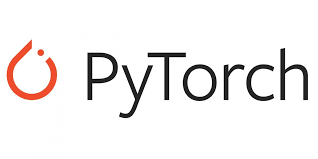



# **Basic Tensor Initialization**

In [ ]:
import torch # We start by importing PyTorch Library

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
my_tensor = torch.tensor([[1,2,3], [4,5,6]], dtype=torch.float32,
                         device=device) # We created a tensor which consists of two rows 3 columns ; [1,2,3] : 1st row, [4,5,6] : 2nd row
print(my_tensor)

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')


In [ ]:
# Other Useful Attributes of Tensor
print(my_tensor.dtype) # print your tensor datatype
print(my_tensor.device)# print which device your tensor is on
print(my_tensor.shape) # shape of your tensor

torch.float32
cuda:0
torch.Size([2, 3])


In [ ]:
# Other Common Initialization Methods
x = torch.empty(size= (3,3)) # Create an empty set of 3x3 matrix or tensor. There is no zero
x = torch.zeros((3,3))       # A tensor with zeros
x = torch.rand((3,3))        # A random tensor between 0 and 1
x = torch.ones((3,3))        # A 3x3 matrix of ones
x = torch.eye(5,5)         # Create an identity matrix , I = eye
print(x)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


In [ ]:
# Basic Tensor Operations
sum_x = torch.sum(x, dim=0)
values, indices = torch.max(x, dim=0) # Returns the values and the indices of the maximum values
values, indices = torch.min(x, dim=0) # Returns the values and the indices of the min values
abs_x = torch.abs(x) # Absolute Value
z = torch.argmax(x, dim=0) # Same thing as torch.max but only returns the index of the one that is the maximum


In [ ]:
# Tensor Indexing
# For example, we have a batch size of 10 and 25 features in a batch
batch_size = 10
features   = 25
x = torch.rand((batch_size, features))

# Let's say we want to get a feature of first example
print(x[0].shape) # It is the same as x[0,:] where 0 = first example of the batch,  : = represents all the features

# First feature of all example
print(x[:,0].shape)


torch.Size([25])
tensor([0.7348, 0.2161, 0.3553, 0.0185, 0.0885, 0.7970, 0.7857, 0.7306, 0.5689,
        0.7863])


In [ ]:
tensor1 = torch.Tensor([1, 2, 3])
# Reshaping a Tensor
tensor2 = torch.reshape(tensor1, (3, 1)) # Reshaping the original tensor (1x3) to (3x1) dimension
print(tensor2)

# Element-wise Operations
tensor3 = tensor1 + tensor2
print(tensor3)

# Matrix Operations
tensor4 = torch.matmul(tensor2, tensor2.T) # Matrix multiplication
print(tensor4)

# Indexing and Slicing
print(tensor1[0])
print(tensor1[0:2])

# Broadcasting allows you to perform operations between tensors of different shapes or sizes without having to explicitly reshape or expand them
# Creating two tensors of different shapes which are immposible to calculate in mathematical terms but operatable in PyTorch
#tensor5 = torch.Tensor([1, 2, 3])
tensor5 = torch.Tensor([1, 2])
tensor6 = torch.Tensor([[1, 2], [3, 4], [5, 6]])
tensor7 = tensor5 + tensor6
print(tensor7)

# Concatenation
tensor8 = torch.Tensor([4, 5, 6])
tensor9 = torch.cat([tensor1, tensor8], dim=0)
print(tensor9)

tensor([[1.],
        [2.],
        [3.]])
tensor([[2., 3., 4.],
        [3., 4., 5.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [2., 4., 6.],
        [3., 6., 9.]])
tensor(1.)
tensor([1., 2.])
tensor([[2., 4.],
        [4., 6.],
        [6., 8.]])
tensor([1., 2., 3., 4., 5., 6.])


# **Autograd**
 Autograd allows PyTorch to automatically and efficiently calculate the gradients of a function with respect to its inputs using the chain rule of calculus.

In [ ]:
# Define a tensor with requires_grad=True to track the gradient
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)

# Define a function to compute the output
def forward(x):
    y = x**2 + 2*x + 1
    return y.sum()
    # Compute the output of the function
y = forward(x)
print(y)

# Compute the gradients of the output with respect to the input
y.backward()

# Print the gradients of the input tensor
print(x.grad)

tensor(29., grad_fn=<SumBackward0>)
tensor([4., 6., 8.])


# **Introduction to Neural Networks**
We will discuss about defining the layers, activation functions, loss function and optimizer step by step

In [ ]:
# Import classes to inherit in order to define the neural network
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
# Define the neural network architecture
class Net:
    def __init__(self):
        self.fc1_w = torch.randn(2, 4, requires_grad=True) # input layer (2 nodes) -> hidden layer (4 nodes)
        self.fc1_b = torch.randn(4, requires_grad=True)
        self.fc2_w = torch.randn(4, 1, requires_grad=True) # hidden layer (4 nodes) -> output layer (1 node)
        self.fc2_b = torch.randn(1, requires_grad=True)

    def forward(self, x):
        x = torch.sigmoid(torch.matmul(x, self.fc1_w) + self.fc1_b)
        x = torch.matmul(x, self.fc2_w) + self.fc2_b
        return x

In [ ]:
# Define the loss function
criterion = nn.MSELoss()

In [ ]:
# Define the optimizer
net = Net()
optimizer = torch.optim.SGD([net.fc1_w, net.fc1_b, net.fc2_w, net.fc2_b], lr=0.1)

In [ ]:
# Define the training data
train_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
train_labels = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

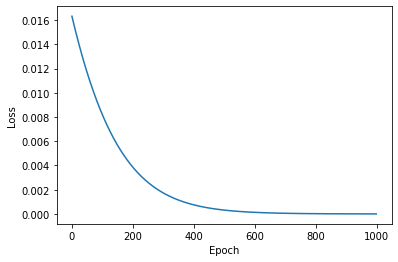

In [ ]:
# Train the neural network
loss_values = []
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net.forward(train_data)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()
    loss_values.append(loss.item())

# Plot the loss curve
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Evaluate the trained neural network
test_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_labels = net.forward(test_data)
print(test_labels)

tensor([[0.0014],
        [0.9982],
        [0.9982],
        [0.0025]], grad_fn=<AddBackward0>)


# **Toy Project for Neural Network PyTorch ( ANN Artificial Neural Network )**

In [ ]:
# Import essential libraries of PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [ ]:
#create fully connected network
class NN(nn.Module):
    def __init__(self,input_size,num_classes):
        super(NN,self).__init__() #inherited init from nn.Module(parent)
        self.fc1 = nn.Linear(input_size,50) #layer 1 >> input node = 784
        self.fc2 = nn.Linear(50, 90)  # hidden layer have 50 nodes
        self.fc3 = nn.Linear(90,num_classes) # hidden layer have 50 nodes
        self.dropout = nn.Dropout(0.25)
        self.bn11 = nn.BatchNorm1d(50)
        self.bn12 = nn.BatchNorm1d(90)

    def forward(self,x):
        x = f.leaky_relu(self.fc1(x),negative_slope=0.01)
        x = self.bn11(x)
        x = f.leaky_relu(self.fc2(x),negative_slope=0.01)
        x = self.dropout(x)
        x = self.bn12(x)
        x = self.fc3(x)
        return x

In [ ]:
#set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 784 # MNIST input = 28x28
num_classes = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 5
#load data
train_dataset = datasets.MNIST(root='dataset/',train=True, transform =transforms.ToTensor(),download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = datasets.MNIST(root='dataset/',train=False, transform =transforms.ToTensor(),download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



In [ ]:
#Initialize network
model = NN(input_size=input_size,num_classes=num_classes).to(device)
#loss function network
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
#train network
for epoch in range(num_epochs):
    losses = []
    for batch_idx,(data,targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)

        #get to correct shape
        data=data.reshape(data.shape[0],-1)

        #forward
        score = model(data)
        loss = criterion(score,targets)
        losses.append(loss.item())

        #backward
        optimizer.zero_grad()
        loss.backward()

        #gradient descent or adam step
        optimizer.step()
    mean_loss = sum(losses) / len(losses)
    print(f'epoch: {epoch+1}/{num_epochs } loss =  {mean_loss:.5f}')

epoch: 1/5 loss =  0.32078
epoch: 2/5 loss =  0.15483
epoch: 3/5 loss =  0.12210
epoch: 4/5 loss =  0.10391
epoch: 5/5 loss =  0.09227


In [ ]:
#Check accuracy
def check_accuracy(loader,model):
    if loader.dataset.train:
        print('checking accuracy on training data')
    else:
        print('checking accuracy on testing data')
    num_correct=0
    num_samples=0
    model.eval()

    with torch.no_grad():
        for x,y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0],-1)

            scores = model(x)
            _,predictions = scores.max(1)
            num_correct+= (predictions==y).sum()
            num_samples+= predictions.size(0)

        print(f'Got {num_correct}/{num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}')
    model.train()


In [ ]:
check_accuracy(train_loader,model)
check_accuracy(test_loader,model)

checking accuracy on training data
Got 59044/60000 with accuracy 98.41
checking accuracy on testing data
Got 9709/10000 with accuracy 97.09
